In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [33]:
cd "C:/Users/h p/Downloads/archive"

C:\Users\h p\Downloads\archive


In [44]:
# Setting up the directories
train_dir = 'C:/Users/h p/Downloads/archive/archive/train'
test_dir = 'C:/Users/h p/Downloads/archive/Downloads/archive/test'

In [45]:
import os
for dirpath,dirname,filenames in os.walk('/kaggle/input/fer2013'):
    print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

(-0.5, 47.5, 47.5, -0.5)

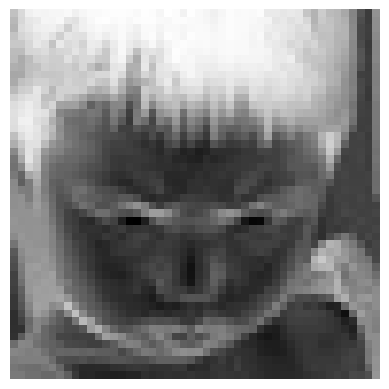

In [47]:
# Let's look at some images
from matplotlib.pyplot import imread
img = imread('C:/Users/h p/Downloads/archive/train/angry/Training_10118481.jpg')
plt.imshow(img,'binary')
plt.axis(False)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory='C:/Users/h p/Downloads/archive/train',class_mode='binary')
test_data = test_datagen.flow_from_directory(directory='C:/Users/h p/Downloads/archive/test',class_mode='binary')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [141]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surbrise']

In [50]:
X,y=train_data.next()

In [51]:
(X>1).sum()

0

In [52]:
(X<0).sum()

0

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [54]:
model_1 = Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(7,activation='softmax')
])
model_1.compile(optimizer=Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [55]:
model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
898/898 [==============================] - 478s 531ms/step - loss: 1.6993 - accuracy: 0.3425 - val_loss: 1.6060 - val_accuracy: 0.3791
Epoch 2/5
898/898 [==============================] - 508s 566ms/step - loss: 1.4707 - accuracy: 0.4403 - val_loss: 1.5153 - val_accuracy: 0.4241
Epoch 3/5
898/898 [==============================] - 476s 531ms/step - loss: 1.3162 - accuracy: 0.5091 - val_loss: 1.5237 - val_accuracy: 0.4369
Epoch 4/5
898/898 [==============================] - 856s 954ms/step - loss: 1.1613 - accuracy: 0.5699 - val_loss: 1.5629 - val_accuracy: 0.4356
Epoch 5/5
898/898 [==============================] - 747s 831ms/step - loss: 1.0084 - accuracy: 0.6285 - val_loss: 1.6734 - val_accuracy: 0.4429


In [56]:
print('probability for guessing randomly:',1/7)

probability for guessing randomly: 0.14285714285714285


In [57]:
print('accuracy of our model:',0.4278)

accuracy of our model: 0.4278


In [58]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    280       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 10)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 7)                 2

In [230]:
images,labels=test_data.next()

Text(0.5, 1.0, '2.0')

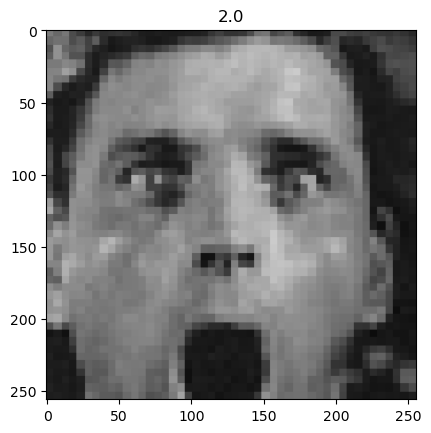

In [231]:
plt.imshow(images[5])
plt.title(labels[1])

In [232]:
img = images[5]
img = np.array([img])
pred = model_1.predict(img)
ss = np.argmax(pred)
ff = int(ss)
class_names[ff]

1/1 [==============================] - 0s 23ms/step


'surbrise'

In [189]:
images,labels=test_data.next()

In [190]:
pred=np.argmax(model_1.predict(tf.expand_dims(images[1],axis=0)))

1/1 [==============================] - 0s 21ms/step


In [191]:
pred

3